# A Practical Introduction to Learning ML using Pytorch

This is a simple introduction to Machine Learning using Pytorch. Before using Pytorch, we will first take a quick look at linear regression using Scikit-Learn a machine learning toolkit, based on a traditional non-neural net approach. This will give you a good idea about the problem we are trying to solve, and help you understand the Pytorch code easily.

## Linear Regression: The Scikit Way ##



As we know the equation of a line is: <br/> $y = mX + c$ <br/> where **m** is the slope of the line and **c** is the constant or the intercept. In machine learning terminology the _m_ is usually represented as a weight or **w** and _C_ is represented as a bias **b**. <br/> _*Linear Regression*_ is a statistical process for determining a line that best fits the given data, so that we can predict the output for any other unseen input values.

Most of the tutorials out there, start with some dataset and try to fit the data. This is a good approach, as in real life you will generally not find any dataset that perfectly follows an equation. But most datasets in real life must be pre-processed before it can be used. But all that pre-processing, adds some overhead to the program and we may get distracted from the important part of the code. Hence here we will just syntesize our own data and compare the, "w" and "b" which we alrady know, with scikit learn model parameters after its done training.


Let us assume that the value of m is 1.29 and c is 24. In that case we can define our function to generate the desired value of y based on a value of x as follows:
<br/>
$y = 1.29x + 24 $

Let us use numpy to create random values. We will then define a function to synthesize the output based on the input.
To create our output _y_ values ( a.k.a _labels_ ) we can use the list comprehension syntax to generate lots of y values corresponding to the input x values.
<br/><br/>If this list comprehension syntax is a bit too much for you  or you simply need a crash course in Python or even a quick refresher before you dive into the code then I would highly recommend this amazing online resource: <a href="https://www.pythonlikeyoumeanit.com/"> https://www.pythonlikeyoumeanit.com/ </a>

Consider the following code [In] #1.


In [1]:
# synthesize the training data from our own line formula

import numpy as np

x_train = np.float32(np.random.rand(50000,1)*10)

def compute_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([compute_output(row) for row in x_train]).reshape(-1,1)

Now that we have the Training Data, let us see how we can use sklearn to solve this simple Linear Regression problem.

In [2]:
from sklearn.linear_model import  LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)

# finally check the weight and constant

lm.score(x_train, y_train)
print(f"Weight: {lm.coef_}")
print(f"Bias (Constant) : {lm.intercept_}")

Weight: [[1.29]]
Bias (Constant) : [23.999998]


As you can see here that sklearn finds the coefficient a.k.a weight and the bias correctly, so we need *not* again verify the results with some test inputs.
In real life problems though, we do not always have just one feature or input variable, we will typically have many varibles. But the linear regression problem remains almost the same and the solution can be extended to multiple variables very easily. Here we are using 4 input variables, numpy helps us to create 50000 random values for each of these 4 variables. Since we have 4 input variables we will obviously have 4 weights. Let us say that the weights are, 1.29, 3.1, 2.22 and 1.9. The b is the same as last time i.e. 13. So our compute_output function can now be mathematically represented as : <br>
$$ y = 1.29 x_{1} + 3.1 x_{2} + 2.22x_{3} + 1.9x_{4}+13 $$

In [4]:
import numpy as np
from sklearn.linear_model import  LinearRegression
x_train = np.float32(np.random.rand(50000,4)*10)

def compute_output(input):
    return (1.29*input[0] + 3.1 * input[1] + 2.22 * input[2] + 1.9*input[3]  +  13)

y_train = np.array([compute_output(row) for row in x_train]).reshape(-1,1)

lm = LinearRegression()

lm.fit(x_train, y_train)

# finally check the weight and constant (bias)

lm.score(x_train, y_train)
print(lm.coef_)
print(lm.intercept_)

[[1.2900004 3.1000004 2.22      1.9000006]]
[12.999985]


Now if you are anything like me your first obvious reaction will be, "Wait, when we are solving any real life problem, what is the guarantee that the relation between input and output is always linear, what if y depends on the $5^{th}$ power of some input variable". It turns out that even that problem is very similar and simple.
Let us consider a single variable problem that involves a higher power of the input variable.
  $y = mx^{3} + c$  </br>
 OR in Python syntax  **y = 5.2 * x ** 3 + 31**

   The trick here is to synthesize multiple variables from a single variable, using powers. For example even if we know that there is only one input variable x, we can say that this equation really has 4 input varibles $x$, $x^{2}$, $x^{3}$, $x^{4}$ . If you are really paying attention, you may ask "why $x^{4}$ ?". I am just trying to emphasize the point that in real life scenarios you may not know if the relation between input involves a power of 3 or power of 4. So let us take a guess and go with 4. Any powers that are not involved will get an almost ZERO coefficient and hence will not be used. So if you really think, now its again the same problem as above; it is a simple linear regression with 4 input variables. We will first see the non sklearn way of achieving it and the use the proper sklearn way of doing the same thing.

In [5]:
import numpy as np
from sklearn.linear_model import  LinearRegression

x_train = np.float32(np.random.rand(50000,1)*10)

# Syntesize output from the random inputs
def compute_output(input):
    return (5.2 * ( input[0] ** 3)  + 31 )

y_train = np.array([compute_output(row) for row in x_train]).reshape(-1,1)

print(f"Original Shape of Input Features {x_train.shape}")

# Magic Trick: assume that the powers may be up to 4 and fabricate additional features using powers

poly_x = np.array([(x, x**2, x**3, x**4) for x in x_train]).reshape(-1,4)

print(f"We fabricated additional features by using powers of the only input variable. New Shape of Input Features {poly_x.shape}")

lm = LinearRegression()

lm.fit(poly_x, y_train)

# finally check the weight and constant  ( bias)

lm.score(poly_x, y_train)
print(f"The 4 Weights: {lm.coef_}")
print(f'The Bias: {lm.intercept_}')


Original Shape of Input Features (50000, 1)
We fabricated additional features by using powers of the only input variable. New Shape of Input Features (50000, 4)
The 4 Weights: [[ 2.8312812e-05 -2.3245811e-06  5.2000022e+00 -5.9604645e-08]]
The Bias: [31.015137]


Notice that the coefficients or weights of the other powers are really small numbers something like -4.7960515e-07 ( something with a $ 10^{-7}$ which is a really small number). Which simply means that this power is inconsequential or simply not present in the actual equation that describes relation between input and output. As you can see it found out the coefficient of $ x^{3}$ correctly.
Now one last bit from the Sklearn world before we jump into the deep downword slope of gradient descent; sklearn preprocessing offers a nicer way of expanding the features from a single variable to multiple variables using the powers. Here is the proper sklearn way

In [6]:
import numpy as np
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_train = np.float32(np.random.rand(50000,1)*10)

# Compute output from the randomly generated input values
def compute_output(input):
    return (5.2 * ( input[0] ** 3)  + 31 )

y_train = np.array([compute_output(row) for row in x_train]).reshape(-1,1)

print(f"Original Shape of Input Features {x_train.shape}")

# Magic Trick: assume that the equation may involve powers maybe up to 4 and fabricate additional features using powers

poly = PolynomialFeatures(4) # we assume that it may contain any powers upto 4, hence that 4 in the input

# The raw way: poly_x = np.array([(x, x**2, x**3, x**4) for x in x_train]).reshape(-1,4)
# the proper sklearn preprocessing  way
poly_x = poly.fit_transform(x_train)

print(f"New Shape of Input Features {poly_x.shape}")


lm = LinearRegression()

lm.fit(poly_x, y_train)

# finally check the weight and bias

lm.score(poly_x, y_train)
print(f'The Weights are: {lm.coef_}')
print(f'The Bias is: {lm.intercept_}')


Original Shape of Input Features (50000, 1)
New Shape of Input Features (50000, 5)
The Weights are: [[ 0.0000000e+00  1.5395880e-04  4.5483932e-05  5.1999965e+00
  -5.9604645e-08]]
The Bias is: [31.016724]


##  Starting from the Scratch: Gradient Descent

There are a lot of resources out there which cover the theory aspects about gradient descent, the learning rate, the loss function and all that. I specifically wanted to keep the **focus on the actual code**. Sometimes the higher level abtractions provided by a ML library make it overwhelming. In the following section we will implement everything from scratch without using any ML library, ofcourse we will still use numpy to syntesize the data and manipulate that data. What I mean is there is No sklearn, No pytorch, No TensorFlow, No MXNet or JAX here. Once you understand some of these basics and how they have evolved into those higher level constructs to take care of a specific part of the code, then the code will look much more easier to understand and modify. Let us consider exactly same problem as Code #1.
<br/><br/> In case you need a super quick refresher then here is the gist. The following code uses the gradient descent technique to reduce the loss by adjusting the weight and the bias. We adjust the weight and bias based on the learning rate. Learning Rate is a hyperparameter that dictates how fast or slow we learn from the loss from the last iteration. It is called a _hyperparameter_ because it is not a real parameter in our actual equiation like the weights and the bias are, but still is very important. So basically here is how it goes; we compute the predicted values using our weight  and bias (a.k.a. using our model), then we calculate the difference between actual output and the predicted output value, calculate the loss using mean square error technique, compute the partial derivatives of the MSE loss with respect to the weights as well as the bias, ( this helps us in tuning the weight and bias to reduce the loss) then adjust the weights and bias using the learning rate and the partial derivative computed in the previous step. We run the above process through multiple iterations to reduce the loss.
    <br><br>If you have not already read something like the above text a hundred times already then you may feel that; this is just a bunch of theoretical BS with some buzzwords thrown around. But I wanted to get to the code as soon as possible, and needed a brief expalantory text before we jump right in to the the actual code. So just go through the code and things will become a bit clearer. Some things may **not** be immediately clear ( for example why we chose the learning rate to be 0.01 ), but just go with it for now and we may touch upon those aspects later.

Here we start with some random values for weight and bias.
Since the difference between the predicted value and the actual value can either be negative or positive, we will take the square of the difference between the predicted value and the actual value, which will always yield a +ve number. Since we have lots of predicted values and actual values, we will take the mean of the square of the difference between predicted and actual values. This is how we define our loss function.

We already know that : <br/><font size="4" color="blue">
    $ y_{predicted} = ( x_{train} w ) + b $ </font>
    
 and if we ignore the mean for the timebeing then the loss function is:<br/>
    <font size="4" color="blue">
   $ loss =   (y_{predicted} - y_{train}) ^{2} $
   </font>
    
So if we replace the value of $y_{predicted}$ in the loss function and use the expansion formulae for the square; <br/><br/>
<font size="3" color="blue">
$(a-b) ^{2} = a^{2} - 2ab + b^{2}  $
<br/>
$(a+b) ^{2} = a^{2} + 2ab + b^{2}$,
</font>
<br/><br/>We get the folllwing :
<br/><b>Step 1:</b><br/><font size="4" color="blue">
$y_{predicted}^{2} - 2y_{predicted}y_{train} + y_{train}^{2} $ <br/>
</font>
<br/><b>Step 2:</b><br/>
<font size="4" color="blue">
$ (x_{train}w + b )^{2} - 2((x_{train}w + b )y_{train}) + y_{train}^{2} $ <br/>
</font>
<br/><b>Step 3:</b><br/>
<font size="4" color="blue">
$ loss = (x_{train}w)^{2}+2x_{train}wb + b^{2} - 2(x_{train}w + b )y_{train}) + y_{train}^{2} $ <br/><br/>
</font>

So that is our actual loss function, now as you might have read the goal is to reduce the loss by tweaking the w and b. This is where the gradient descent comes into picture. Usually when we talk about derivatives or differentiation, we are finding the derivative of a function with respect to the variable x. That is not the case here and hence may be a bit tricky to grasp at first. Our variables are the weight "w" and the bias "b". So we will be differentiating the above loss function first with respect to w and then with respect to b.
<br/> So basically we are trying to find out these two quantities $  \frac {dloss} {dw}  $
and $  \frac {dloss} {db} $
<br/> Now take a pen and paper and try to actually find out the differentiation yourself, dont just take my word for it. So the derivative of loss with respect to w turns out to be the following: <br/><br/>
<font size="4" color="blue">
    $ \frac{dloss}{dw} = 2 (x_{train})^{2}w + 2x_{train}b - 2x_{train}y_{train} $
</font>
<br/><br/> If you take out the common $ 2 x_{train}$ then it becomes: <br/><br/>
<font size="4" color="blue">
$ \frac{dloss}{dw} = 2 (x_{train}) ( x_{train}w + b - y_{train} ) $ <br/>
</font>
</br> if you replace the $x_{train}w + b $ with the $ y_{predicted} $ and you get this: <br/><br/>
<font size="4" color="blue">
$ \frac{dloss}{dw} = 2 x_{train} ( y_{predicted} - y_{train} ) $ <br/><br/></font>
In Python code it will look something like this: <br/><br/>
 w_grad = (2 * (y_pred - y_train) * x_train ).mean()
  <br/> <br/>Similarly if you try to solve the other differentiation you will end up with this: <br/>
<font size="4" color="blue">
$  \frac {dloss} {db}  = 2 (y_{predicted} - y_{train})$
</font>
<br/><br/> In Python code it will be as follows: <br/><br/>
   b_grad = (2 * (y_pred - y_train) ).mean()




### No Pytorch Code

Whatever theory we discussed above is implementd below using Python and numpy. We are not using pytorch yet.

In [15]:
import numpy as np
x_train = np.random.rand(5000,1)*10

#Synthesize training data; we will verify the weights and bias later with the trained model

def synthesize_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([synthesize_output(row) for row in x_train]).reshape(-1,1)

# Initialize Weights and Bias to random starting values

w = np.random.rand(1,1)
b = np.random.rand(1,1)

# how much do we want to tweak the weight and bias a.k.a learning rate
learning_rate = 0.01

for iter in range(2001):

    # forward pass : predict values: assume the random weight and bias are correct and then calculate the output
    # this clip(min=0) is also something very important, and is called an Activation Function
    # it is used to avoid any negative values
    # for now dont worry about it, we need it here, just make a mental note of this

    y_pred = (x_train * w).clip(min=0) + b

    # find loss. We know the actual output ( t_train ), so use the mean square of the difference , this is our loss function
    loss = ((y_pred - y_train)**2).mean()

    # Backword pass for computing gradients. Now as you may have read gradient is a partial derivitive;
    # once with respect to the weight ( dW) and once with respect to the bias (dB).

    w_grad = (2 * (y_pred - y_train) * x_train ).mean()
    b_grad = (2 * (y_pred - y_train) ).mean()

    # Just printing the loss to see how it is changing over the iterations, afterall we want to minimize it
    if (iter % 400) == 0:
        print(f"Iter: {iter}, Loss={loss}")

    # Manually updating weights
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    
# finally check the weight and bias
print(f"\n\nWeight: {w} \n\nBias: {b}")

Iter: 0, Loss=835.1124797546147
Iter: 400, Loss=2.8193445873383
Iter: 800, Loss=0.06034491020664517
Iter: 1200, Loss=0.0012916151520472364
Iter: 1600, Loss=2.7645574337339908e-05
Iter: 2000, Loss=5.917225260403407e-07


Weight: [[1.29023164]] 

Bias: [[23.99845356]]


As you can see we found out the weight and bias correctly. Pytorch or any of the ML libraries that are out there provide many constructs to do some of the things that we did manually here, thereby making the code much easier and cleaner. For example Pytorch offers something called as tensors that takes care of computing partial derivatives automatically. This is called automatic differentiation, it knows how to compute the gradient based on whatever operations we perform on those tensors. Before we jump into that aspect, let us just start by first using the tensors instead of numpy array. We will use the same example:

### Pytorch Code 0

In [31]:
import numpy as np
import torch

x_train = np.float32(np.random.rand(50000,1)*10)

#Synthesize training data; we will verify the weights and bias later with the trained model
def synthesize_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([synthesize_output(row) for row in x_train]).reshape(-1,1)

# instead of the numpy array use Pytorch tensors. Why ? Because I said so :)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

learning_rate = 0.01

# Initialize Weights and Bias to random starting values the pytorch way:
# but essentially we are still doing somethin very similar to np.random.rand(1,1)

w = torch.rand(1, 1, requires_grad=True)
b = torch.rand(1, 1, requires_grad=True)

for iter in range(2001):

    # forward pass : predict values the Pytorch way but essentially we are still doing
    # something very similar to : y_pred = (x_train * w).clip(min=0) + b
    # Also notice that clip(min=0) has become clamp(min=0) now

    y_pred = X_train.mm(w).clamp(min=0).add(b)

    # find loss the Pytorch way but essentially we are still doing
    # something very similar to :   loss = ((y_pred - y_train)**2).mean()

    loss = (y_pred - Y_train).pow(2).mean()

    # Backword pass for computing gradients
    # this we are still using the Non Pytorch way,

    w_grad = (2 * (y_pred - Y_train) * X_train ).mean()
    b_grad = (2 * (y_pred - Y_train) ).mean()

    #Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
        print(f"Iter: {iter}, Loss={loss}")

    # Manually updating the weights
    # since w happen to be a tensor anything we do will affect its gradient
    # hence this with torch.no_grad is very important here

    with torch.no_grad():
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad
   
#finally check the weight and bias
print(f"\n\nWeights: {w} \n\nBias: {b}")




X_train: False 

Y_train: False
Iter: 0, Loss=896.9687966400587
Iter: 400, Loss=2.5573609038850376
Iter: 800, Loss=0.05028300700492502
Iter: 1200, Loss=0.0009887275694596257
Iter: 1600, Loss=1.9441233538062694e-05
Iter: 2000, Loss=3.887154188056094e-07


Weights: tensor([[1.2902]], requires_grad=True) 

Bias: tensor([[23.9988]], requires_grad=True)


Notice that both Weights and Bias are tensors themselves. If you want to access the actual value of a tensor and if you know that it has only 1 element then you can use the item() method.

In [35]:
print(f"\n\nWeight: {w.item()} \n\nBias: {b.item()}")



Weight: 1.2901877164840698 

Bias: 23.998760223388672


In the example above, even though we were using Pytorch and tensors, we were still trying to compute gradient manually. The whole point of using tensors is it's *Autograd* feature. In our example the requires_grad property of the X_train and Y_train was set to "False". 

In [42]:
print(f"\n\nX_train.requires_grad: {X_train.requires_grad}   Y_train.requires_grad: {Y_train.requires_grad}")



X_train.requires_grad: False   Y_train.requires_grad: False


Now we will start using the *Autograd* feature which is the proper Pytorch way and we will also start using some of the basic Neural Network constructs from Pytorch. Instead of we maintaining two tensors for weight and bias, the linear transformation provided by torch.nn.Linear can maintain its own weights and bias internally. First we will start by using its internal weight but not the bias.

### Pytorch Code 1

In [43]:
import numpy as np
import torch

x_train = np.float32(np.random.rand(50000,1)*10)

#Synthesize training data; we will verify the weights and bias later with the trained model

def synthesize_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([synthesize_output(row) for row in x_train]).reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

learning_rate = 0.01

# No need to Initialize the Weights as nn.Linear will maintain weights internally
# notice bias = False, we are not using its internal bias
model = torch.nn.Linear(1, 1, bias = False)

# let us still use our own bias tensor
b = torch.rand(1, 1, requires_grad=True)

for iter in range(2001):

    # forward pass : predict values
    y_pred = model(X_train).clamp(min=0).add(b)

    # find loss
    loss = (y_pred - Y_train).pow(2).mean()


    # Backword pass for computing gradients; Here we are using the Pytorch tensor
    # to automatically compute the gradient for us
    loss.backward()

    #Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")


    #Manually updating weights
    with torch.no_grad():
        b -= learning_rate * b.grad
        # Since the weights are now encapsulated inside the Linear Model m
        # this is how you update the weights; the Pytorch way
        for param in model.parameters():
            param -= learning_rate * param.grad
            # since the weights ( params) are maintained internally by the model m
            # we must reset them to zero after every pass
            # it can done by directly calling m.zero_grad()
        param.grad.zero_()
        b.grad.zero_()

#finally check the weight and bias
print(f"\nBias: {b} \nWeights: ")

for param in model.parameters():
            print(param)

Iter: 0, Loss=889.0933374490211
Iter: 400, Loss=2.696017821172194
Iter: 800, Loss=0.05439589078664055
Iter: 1200, Loss=0.001097653136043394
Iter: 1600, Loss=2.2126491664777967e-05
Iter: 2000, Loss=4.47534672195896e-07

Bias: tensor([[23.9987]], requires_grad=True) 
Weights: 
Parameter containing:
tensor([[1.2902]], requires_grad=True)


In the following example now we are not maintaining the bias tensor externally, nn.Linear model will maintain the weight and bias tensor internally

### Pytorch Code 2

In [44]:
import numpy as np
import torch

x_train = np.float32(np.random.rand(50000,1)*10)

#Synthesize training data; we will verify the weights and bias later with the trained model

def synthesize_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([synthesize_output(row) for row in x_train]).reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

learning_rate = 0.01

# No need to Initialize the Weights or even the bias now as nn.Linear will maintain weights & bias internally
m = torch.nn.Linear(1, 1, bias = True)

for iter in range(2001):

    # forward pass : predict values
    y_pred = m(X_train).clamp(min=0)

    # find loss
    loss = (y_pred - Y_train).pow(2).mean()

    # Backword pass for computing gradients; Here we are using the Pytorch tensor
    # to automatically compute the gradient for us
    loss.backward()

    #Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")

    #Manually updating weights
    with torch.no_grad():
        # b -= learning_rate * b.grad
        # Since the weights are now encapsulated inside the Linear Model m
        # this is how you update the weights; the Pytorch way
        for param in m.parameters():
            param -= learning_rate * param.grad

        m.zero_grad()

# finally check the weight and bias
print(f"\nBias: {m.state_dict()['bias']} \nWeight: {m.state_dict()['weight']}\n")

# the weights and bias ( if present ) can also be accessed as params
for param in m.parameters():
            print(param)

Iter: 0, Loss=661.9574985984166
Iter: 400, Loss=2.5643893082382605
Iter: 800, Loss=0.05130146661617202
Iter: 1200, Loss=0.0010264186666340284
Iter: 1600, Loss=2.054430014001106e-05
Iter: 2000, Loss=4.1591298090258304e-07

Bias: tensor([23.9987]) 
Weight: tensor([[1.2902]])

Parameter containing:
tensor([[1.2902]], requires_grad=True)
Parameter containing:
tensor([23.9987], requires_grad=True)


Now we will start using the torch.nn.Sequential container to create a more complex layered model. It takes in the input and chains various functions. In our case it feeds the input to a nn.Linear and passes the output to the ReLU() function as an input. This ReLU() is Rectified Linear Unit, which as you will see is nothing but our clip or clamp function.

### Pytorch Code 3

In [45]:
import numpy as np
import torch

x_train = np.float32(np.random.rand(50000,1)*10)

# Synthesize training data; we will verify the weights and bias later with the trained model

def synthesize_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([synthesize_output(row) for row in x_train]).reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

learning_rate = 0.01

model = torch.nn.Sequential( torch.nn.Linear(1,1), torch.nn.ReLU())

for iter in range(2001):

    y_pred = model(X_train)

    # find loss
    loss = (y_pred - Y_train).pow(2).mean()

    # as you can see you can reset the gradients to zero here or after the backward pass
    model.zero_grad()

    # Backword pass for computing gradients
    loss.backward()

    # Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")


    # still updating the weights Manually
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# finally check the weight and bias

print(f"\nBias: {model[0].bias.item()} \nWeights:")

for param in model.parameters():
            print(param)

Iter: 0, Loss=935.9790140963855
Iter: 400, Loss=2.5787700305199546
Iter: 800, Loss=0.051298796767995855
Iter: 1200, Loss=0.0010207113129141296
Iter: 1600, Loss=2.032542230729029e-05
Iter: 2000, Loss=4.104189362297904e-07

Bias: 23.99872398376465 
Weights:
Parameter containing:
tensor([[1.2902]], requires_grad=True)
Parameter containing:
tensor([23.9987], requires_grad=True)


We are almot there, now instead of manually adjusting the weights we will use a Stochastic gradient descent Optimizer or SGD Optimizer. At first it sounds a bit too intimidating but now we know what it is really doing inside, it is just tweaking the weights and bias with the specified learning rate. Also we will use the torch.nn.MSELoss loss function instead of manually calculating the loss. This will make it a full blown Pytorch example.

### Pytorch Code 4

In [46]:
import numpy as np
import torch

x_train = np.float32(np.random.rand(50000,1)*10)

#Synthesize training data; we will verify the weights and bias later with the trained model

def synthesize_output(input):
    return (1.29*input[0] + 24)

# Note the dtype='f' at the end it was not there in earlier example, this is a minor nuiance of using the library loss function,
# if you omit that the loss() function will give you an error
# alternatively you can just change he y_train data type while passing to the loss function
# like this   loss = loss_fn(y_pred, Y_train.float())

y_train = np.array([synthesize_output(row) for row in x_train], dtype='f').reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

learning_rate = 0.01

model = torch.nn.Sequential( torch.nn.Linear(1,1), torch.nn.ReLU())

loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for iter in range(1, 4001):

    y_pred = model(X_train)

    # find loss
    loss = loss_fn(y_pred, Y_train)

    # Backword pass for computing gradients
    loss.backward()

    # Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")

    # No more manually adjusting the weights and bias
    optimizer.step()
    model.zero_grad()

# finally check the weight and bias

print(f"\nBias: {model[0].bias.item()} \n")

print(f"Weight: {model[0].state_dict()['weight']}\n Params:")

for param in model.parameters():
            print(param)

Iter: 400, Loss=2.707137107849121
Iter: 800, Loss=0.05421265587210655
Iter: 1200, Loss=0.0010858020978048444
Iter: 1600, Loss=2.177524584112689e-05
Iter: 2000, Loss=4.3822794282277755e-07
Iter: 2400, Loss=9.072453011071957e-09
Iter: 2800, Loss=9.072453011071957e-09
Iter: 3200, Loss=9.072453011071957e-09
Iter: 3600, Loss=9.072453011071957e-09
Iter: 4000, Loss=9.072453011071957e-09

Bias: 23.99980926513672 

Weight: tensor([[1.2900]])
 Params:
Parameter containing:
tensor([[1.2900]], requires_grad=True)
Parameter containing:
tensor([23.9998], requires_grad=True)


Now the last step. Using the Object Oriented Paradigm. Here we will declare our own class for the model.

### The Full Code: OOP Way


In [13]:
import numpy as np
import torch
import torch.nn as nn

x_train = np.float32(np.random.rand(50000,1)*10)

# Synthesize training data; we will verify the weights and bias later with the trained model

def synthesize_output(input):
    return (1.29*input[0] + 24)

y_train = np.array([synthesize_output(row) for row in x_train]).reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

learning_rate = 0.01

# our own class representing the Linear Regression Model
# it is derived from nn.Module
class My_Linear_Regression(nn.Module):
    # this is almost like a constructor
    def __init__(self):
        super().__init__() # this is like calling the base class constructor
        self.network = torch.nn.Sequential( torch.nn.Linear(1,1), torch.nn.ReLU())

    def forward(self, x):
        return self.network(x)

# Actual Linear Regression Code

model = My_Linear_Regression()
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for iter in range(2001):

    y_pred = model(X_train)

    # find loss
    loss = loss_fn(y_pred, Y_train.float())

    model.zero_grad()
    #Backword pass for computing gradients
    loss.backward()

    #Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")

    # Optimize the weights and bias using the SGD Optimizer
    optimizer.step()
    model.zero_grad()

# finally check the weight and bias

print(f"\nBias: {model.network[0].bias.item()} \n")

print(f"Weight: {model.network[0].state_dict()['weight']}")



Iter: 0, Loss=933.9694213867188
Iter: 400, Loss=2.976010322570801
Iter: 800, Loss=0.059272490441799164
Iter: 1200, Loss=0.0011803177185356617
Iter: 1600, Loss=2.351148214074783e-05
Iter: 2000, Loss=4.658043337713025e-07

Bias: 23.998640060424805 

Weight: tensor([[1.2902]])


### One Last Code Example


As you can see above to keep things really simple we always used a single variable, when you are dealing with real life problems or a practical neural network example, there always will be a lot more variables than what we have seen here. The nn.Linear class, which is the basic building block, is perfectly capable of taking any number of inputs and delivering an output which we can then pass on to the next layer, it does not have to be a ReLU() it can be something much more sophisticated. The nn.Sequential can chain many such constructs to achieve something that works fantastically but nobody really understands :-) <br/> So to give you a taste of this multi variable Neural Network here is the last program that models the following equation: $ y = 4.44x_{4} + 3.33x_{3} + 2.22x_{2} + 1.11x_{1} + 12.34 $  

In [47]:
import numpy as np
import torch
import torch.nn as nn

x_train = np.float32(np.random.rand(50000,4)*10)

# Synthesize training data; we will verify the weights and bias later with the trained model
def synthesize_output(input):
    return (1.11*input[0] + 2.22*input[1] + 3.33*input[2] + 4.44*input[3] + 12.34)

y_train = np.array([synthesize_output(row) for row in x_train], dtype="f").reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

# class representing the Linear Regression Model

class My_Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        # This is our 2 Layer NN
        self.network = torch.nn.Sequential( torch.nn.Linear(4,1), torch.nn.ReLU())

    def forward(self, x):
        return self.network(x)

# Why do you need to change the learning_rate ??
learning_rate = 0.005

model = My_Linear_Regression()
loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
#optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


for iter in range(8001):

    y_pred = model(X_train)

    #find loss
    loss = loss_fn(y_pred, Y_train)

    model.zero_grad()
    #Backword pass for computing gradients
    loss.backward()

    #Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")

    #Optimize the weaights and bias
    optimizer.step()
    model.zero_grad()

#finally check the weight and bias

print(f"\nBias: {model.network[0].bias.item()} \n")

print(f"Weight: {model.network[0].state_dict()['weight']}\nParams:")

for param in model.network.parameters():
            print(param)

Iter: 0, Loss=4921.56298828125
Iter: 400, Loss=5.5696210861206055
Iter: 800, Loss=3.035254955291748
Iter: 1200, Loss=1.6541084051132202
Iter: 1600, Loss=0.9014352560043335
Iter: 2000, Loss=0.4912509620189667
Iter: 2400, Loss=0.2677142322063446
Iter: 2800, Loss=0.14589495956897736
Iter: 3200, Loss=0.07950828969478607
Iter: 3600, Loss=0.04332922771573067
Iter: 4000, Loss=0.023612847551703453
Iter: 4400, Loss=0.012868424877524376
Iter: 4800, Loss=0.007012772373855114
Iter: 5200, Loss=0.0038216852117329836
Iter: 5600, Loss=0.0020827155094593763
Iter: 6000, Loss=0.0011350527638569474
Iter: 6400, Loss=0.0006185754318721592
Iter: 6800, Loss=0.0003371289058122784
Iter: 7200, Loss=0.00018373165221419185
Iter: 7600, Loss=0.00010012908751377836
Iter: 8000, Loss=5.4566040489589795e-05

Bias: 12.313308715820312 

Weight: tensor([[1.1112, 2.2212, 3.3312, 4.4412]])
Params:
Parameter containing:
tensor([[1.1112, 2.2212, 3.3312, 4.4412]], requires_grad=True)
Parameter containing:
tensor([12.3133], requ

Hmmm, we did not get the Bias accurately this time, also if you have noticed above, I had to change the learning rate to 0.005 and the epoch ( number of iterations ) are changed from 4001 to 8001. Why ?? The reason is that the previous learning rate and the number of epochs simply will not work here.

Now check the following code, even if we half the epochs i.e. make it 4000 instead of 8000 we still get better accuracy if we use the Adam optimizer. If you observe carefully I have also changed the learning rate to 0.5. Adam uses adaptive learning rate instead of using a constant learning rate. It uses an algorithm called momentum to speed up the gradient descent and hence finds the minima faster than the SGD Optimizer.


In [48]:
import numpy as np
import torch
import torch.nn as nn

x_train = np.float32(np.random.rand(50000,4)*10)

# Synthesize training data; we will verify the weights and bias later with the trained model
def synthesize_output(input):
    return (1.11*input[0] + 2.22*input[1] + 3.33*input[2] + 4.44*input[3] + 12.34)

y_train = np.array([synthesize_output(row) for row in x_train], dtype="f").reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

# class representing the Linear Regression Model

class My_Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        # This is our 2 Layer NN
        self.network = torch.nn.Sequential( torch.nn.Linear(4,1), torch.nn.ReLU())

    def forward(self, x):
        return self.network(x)

# Why do you need to change the learning_rate ??
learning_rate = 0.5

model = My_Linear_Regression()
loss_fn = torch.nn.MSELoss(reduction='mean')

# Let us use a different Optimizer instead of SGD let us use Adam
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for iter in range(4001):

    y_pred = model(X_train)

    #find loss
    loss = loss_fn(y_pred, Y_train)

    model.zero_grad()
    #Backword pass for computing gradients
    loss.backward()

    #Just printing the loss to see how it is changing over the iterations
    if (iter % 400) == 0:
         print(f"Iter: {iter}, Loss={loss}")

    #Optimize the weaights and bias
    optimizer.step()
    model.zero_grad()

#finally check the weight and bias

print(f"Bias: {model.network[0].bias.item()} \n")

print(f"Weight: {model.network[0].state_dict()['weight']}\n Params:")

for param in model.network.parameters():
            print(param)

Iter: 0, Loss=4655.3154296875
Iter: 400, Loss=0.1752150058746338
Iter: 800, Loss=9.849809430306777e-05
Iter: 1200, Loss=1.2119466541449242e-09
Iter: 1600, Loss=3.936969847351257e-11
Iter: 2000, Loss=3.059649408831966e-11
Iter: 2400, Loss=2.2863096832415053e-11
Iter: 2800, Loss=2.245295095681943e-11
Iter: 3200, Loss=1.0858893645382395e-11
Iter: 3600, Loss=1.0858893645382395e-11
Iter: 4000, Loss=4.85895733370878e-11
Bias: 12.339998245239258 

Weight: tensor([[1.1100, 2.2200, 3.3300, 4.4400]])
 Params:
Parameter containing:
tensor([[1.1100, 2.2200, 3.3300, 4.4400]], requires_grad=True)
Parameter containing:
tensor([12.3400], requires_grad=True)


## About Epochs and Minibatches

Now consdier the following code here we have changed the epochs to a considerably smaller number, from 4000 down to a mere 100. But we still get the same accuracy. That is because even if the epochs have been reduced we make sure that we are adjusting the weights exactly the same number of times as before.

An __"epoch"__ is when you have gone through the entire training dataset once and completed the forward and backward pass on the entire training data. So if you have a huge dataset then you will need to go through the entire dataset before you get a chance to update your weights.

If instead of going through the the entire training dataset, we start updating the weights after a small subset of the training data then we can update the weights many more times. So we divide our training data into smaller subsets. Each subset is called a __"minibatch"__. We adjust the weights after every minibatch. So if you divide your entire training dataset into smaller subset, which is let us say is 10 times smaller than the training data, then you can adjust the weights 10 times during just one epoch. Hence now you can even reduce the epochs by a factor of 10. Take this with a pinch of salt, but you get the general idea. Now check the code below, now we have only 100 epoch and our minibatch size is 50.

NOTE: Pytorch provides a DataLoader class which is typically used to create minibatches and iterate over the entire training dataset. But for us to use DataLoader we must first wrap our training data in a DataSet class. It is not that hard but for the sake of simplicity instead of implementing our own custom dataset we will just use another "for" loop to demonstrate the minibatches concept. In real life we always use a DataLoader, with an appropriate minibatch size, as it also makes it possible to deal with really humongus datasets with whatever finite RAM size we may have at our disposal. In other words it reduces the memory requirements.

In [50]:
import numpy as np
import torch
import torch.nn as nn

x_train = np.float32(np.random.rand(50000,4)*10)

# Synthesize training data; we will verify the weights and bias later with the trained model
def synthesize_output(input):
    return (1.11*input[0] + 2.22*input[1] + 3.33*input[2] + 4.44*input[3] + 12.34)

y_train = np.array([synthesize_output(row) for row in x_train], dtype="f").reshape(-1,1)

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

# class representing the Linear Regression Model

class My_Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        # This is our 2 Layer NN
        self.network = torch.nn.Sequential( torch.nn.Linear(4,1), torch.nn.ReLU())

    def forward(self, x):
        return self.network(x)

# Why do you need to change the learning_rate ??
learning_rate = 0.5

model = My_Linear_Regression()
loss_fn = torch.nn.MSELoss(reduction='mean')

# Let us use a different Optimizer instead of SGD let us use Adam
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for iter in range(1,101):
   for mbi in range(1,2001,50):
            y_pred = model(X_train[mbi:(mbi+50)])

            #find loss
            loss = loss_fn(y_pred, Y_train[mbi:(mbi+50)])

            #Backword pass for computing gradients
            loss.backward()

            #Optimize the weaights and bias
            optimizer.step()

            model.zero_grad()

   if(iter % 10 == 0):
       print(f"iter: {iter} loss: {loss}")

#finally check the weight and bias

print(f"\n\nBias: {model.network[0].bias.item()} \n")

print(f"Weight: {model.network[0].state_dict()['weight']}\n ")



iter: 10 loss: 0.1966669261455536
iter: 20 loss: 0.00014466181164607406
iter: 30 loss: 2.3752364519680214e-09
iter: 40 loss: 3.667082609792871e-11
iter: 50 loss: 1.6007107098148232e-11
iter: 60 loss: 1.338776225295879e-11
iter: 70 loss: 1.222360841018899e-11
iter: 80 loss: 1.3678800279970371e-11
iter: 90 loss: 7.639755147947902e-12
iter: 100 loss: 1.6880221179182975e-11


Bias: 12.339997291564941 

Weight: tensor([[1.1100, 2.2200, 3.3300, 4.4400]])
 


As you can see above we achived the same level of accuracy using a different Optimizer and changing the learning rate and changing the epochs and dividing it in smaller minitbacthes.

So now the important qustion is how do you decide what should be the learning rate and how many epochs do we need? How to choose the correct optimizer and how to decide the minibact size? How do you find these optimal values to get good results ?

Now that my friend is a Black Art, or in other words even I dont know all the answers yet, I am also still learning.
<br/>One more thing to notice here is that so far the data was fabricated by us and we had some idea about the relation between the inputs and output. But what if in the real world we get some datadump that follows a complex mathematical model like:<br/></br>
  $y = 5.3x_{1}^{3} + x_{2}^{-1} + 32x_{3}^{5}+ 3x_{3}^{-2}+24x_{3}+ (x_{4} + x_{2})^{2} + 345$ </br></br>
What do you do in such a case? Trial and Error? Keep expanding every input variable? Remember that we will not have any idea whatsoever about the underlying mathematical model in this case. So how do you go about solving such a real life problem? Can adding multiple hidden layers help us in such situations?
<br/>So far our Neural Network model was so basic that it was not really a network as such. The problems we were dealing with did not really require multiple layers. But we may have to use multiple hidden layers to solve the the next set of problems  <br/><br/>Let us try to understand another important class of problems termed as "Classification" a.k.a. "Logistic Regression" in the next Section.

# Classification Problems

Whenever people talk about classification problems or Logistic Regression problems, they think of MNIST Digit Recognition example. That is a really kool program to try but since every digit consists of multiple pixels and pixels can have different gray levels, the input data soon becomes an hindrance in understanding the core logic. So let us start with something much simpler but good enough to prove the point. First let us try the SVM and KNeighbours Classifiers from sklearn and then we will dive into Pytorch. In the end we will try to attempt the famous MNIST Digit Recognition problem.

## The sklearn Classifier way

In [17]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

x_data = np.float32(np.random.rand(20000,5)*10)

# This is our actual classifier function that decides one of the 4 possible states
# based on some logic which is not that simple but follows some logic

def synthesize_output(input):
    if ( input[0] > 5):
        return "red"

    if ( input[1] + input[2]) > 10:
        return "blue"

    if ( input[1] * 2 ) < 7 :
        return "red"
    if ( input[4] > input[0]):
        return "black"

    if (input[2] < 3):
        return "green"
    if (input[3] - input[2]) > 1 :
        return "green"
    else:
        return "black"

y_data = np.array([synthesize_output(row) for row in x_data]).reshape(-1,1).flatten()

# Our labels are strings like "red","blue","green","black"
# So let us use labelEncoder to convert these string values into numbers

le = preprocessing.LabelEncoder()
le.fit(y_data)
y_labels = le.transform(y_data)
print(f'Y data shape {y_data.shape} y_label shape: {y_labels.shape}')

# Now we have proper data all inputs as well as the outputs are numbers

# Let us Train our classifier on the first 19500 images:
# we could have also used the sklearn.model_selection.train_test_split() function here
# but let us keep things simple here

train_x = x_data[:19500]
# In case you dont understand what the heck is happening here in the above line
# I highly reccommend going through https://www.pythonlikeyoumeanit.com/
# We are just spliting the data, or more appropriately just taking the first 19500 samples
# I know it is not the recommonded 70:30 split but just go with it for now

train_y = y_labels[:19500]

# clf_KN = KNeighborsClassifier()
clf_KN = KNeighborsClassifier(n_neighbors=6,weights='distance')

# clf_SVM = svm.SVC(gamma=0.001)
clf_SVM = svm.SVC(gamma='scale',class_weight='balanced',C=100)


# Train the model
clf_KN.fit(train_x, train_y)
clf_SVM.fit(train_x, train_y)


# predict the labels for next 1000 inputs
test_x = x_data[19500:20000]
expected = y_labels[19500:20000].tolist()

predicted_KN = clf_KN.predict(test_x)
predicted_SVM = clf_SVM.predict(test_x)

print("Accuracy KN: ", accuracy_score(expected, predicted_KN))
print("Accuracy SVM: ", accuracy_score(expected, predicted_SVM))





Y data shape (20000,) y_label shape: (20000,)
Accuracy KN:  0.958
Accuracy SVM:  0.99


As you can see using these sklearn classifiers is really easy. SVM seems to do a pretty decent job with our dataset.<br/>
Now let us try the same thing with Pytorch and see if we can do any better than the above algorithms.

## The Pytorch way

We will try to solve exactly the same problem as above. When you are using Pytorch or any neural network for that matter for a classification problem, then one of the most important things to understand here is that since there are 4 possible classification buckets, hence the output of such an excercise is going to be a tensor or in layman terms and array of 4, indicating the probability of each classication outcome. The one with the highest probability is the answer. Each of these probabilities are represented by one linear equation. Why linear ? Because that is the basic unit of a NN. So basically what we are saying here is this:

$y_{red} = x_{0}w_{red0} + x_{1}w_{red1} + x_{2}w_{red2} + x_{3}w_{red3} + x_{4}w_{red4} + b_{red}$
<br/>
$y_{blue} = x_{0}w_{blue0} + x_{1}w_{blue1} + x_{2}w_{blue2} + x_{3}w_{blue3} + x_{4}w_{blue4} + b_{blue}$
<br/>
$y_{green} = x_{0}w_{green0} + x_{1}w_{green1} + x_{2}w_{green2} + x_{3}w_{green3} + x_{4}w_{green4} + b_{green}$
<br/>
$y_{black} = x_{0}w_{black0} + x_{1}w_{black1} + x_{2}w_{black2} + x_{3}w_{black3} + x_{4}w_{black4} + b_{black}$

Please note that $y_{red}$ is the Probabality that the outcome will be red. If we use numbers instead of this red, blue , green and black then it will be a bit more generalized. So we will have weights like $w_{0,0},w_{0,1}, w_{0,2} $..... to all the way upto $w_{3,2},w_{3,3}$ <br>
Which essentially means we will have 4 sets of 5 weights each and similarly 4 biases one for each outcome.

Following code is intentionally very raw and does not use many of the Pytorch constructs we saw above, for example nn.Linear or OOP. Hopefully it gives a better insight into what is exactly happening inside.

In [18]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

x_data = np.float32(np.random.rand(20000,5)*10)

# This is our actual classifier function that decides one of the 4 possible states
# based on some logic which is not that simple but follows some logic

def synthesize_output(input):
    if ( input[0] > 5):
        return "red"

    if ( input[1] + input[2]) > 10:
        return "blue"

    if ( input[1] * 2 ) < 7 :
        return "red"
    if ( input[4] > input[0]):
        return "black"

    if (input[2] < 3):
        return "green"
    if (input[3] - input[2]) > 1 :
        return "green"
    else:
        return "black"

y_data = np.array([synthesize_output(row) for row in x_data]).reshape(-1,1).flatten()

# Our labels are strings like "red","blue","green","black"
# So let us use labelEncoder to convert these string values into numbers

le = preprocessing.LabelEncoder()
le.fit(y_data)
y_labels = le.transform(y_data)

# So even if the actual label is like "red" it will become something like 3 after label encoding
# check it yourself
print(f'Actual Label[0]={y_data[0]} After Label Encoding = {y_labels[0]}')

import torch
import torch.nn.functional as F


# Randomly initialize weights W
W = torch.randn(5, 4)
W.requires_grad_()

# Initialize bias b as 0s and specify that we do want Pytorch
# automatically compute th gradient everytime we do any operation on b
b = torch.zeros(4, requires_grad=True)

# We will use the SGD Optimizer here with a learning rate of 0.1
optimizer = torch.optim.SGD([W,b], lr=0.01)

# Let us split the training data and test data
# we will use the first 19500 as training data and the last 500 as the test data
train_x = x_data[:19500]
train_y = y_labels[:19500]


# convert the training data to a tensor first
x_tr = torch.from_numpy(train_x)
y_tr = torch.from_numpy(train_y)

# how do we decide the number of epochs? Black Art ?
for iter in range(1,201):
    for mb in range(1,19500,100):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        y = torch.relu(torch.matmul(x_tr[mb:(mb+100)], W) + b)

        # As we know that these are really the probabilities of the input belonging to class "red", "blue" etc,
        # hence these values must be in the range of 0 to 1.
        # One typically uses the softmax function from the torch.nn.functional
        # But we can use something better than that i.e. cross_entropy function which internally already uses softmax
        cross_entropy = F.cross_entropy(y, y_tr[mb:(mb+100)].long())

        # Backward pass
        cross_entropy.backward()
        optimizer.step()
    if (iter % 50 == 0):
        print(f"Iter: {iter} Loss: {cross_entropy.item()}")


# How to interpret the results
# Let us randomly examine the fifth label and the predicted label
print(f'Verify Results randomly \n\nActual Label[5]: {y_data[5]} \nAfter Label Encoding: {y_labels[5]}')

# What is predicted by out model
y_5 = torch.relu(torch.matmul(x_tr[5], W) + b)
print(f'Predicted Probabalites for input[5]: {y_5}')

# agrmax function returns the index of the highest value
print(f'Prediction for input[5]:  {torch.argmax(y_5)}')

if (y_labels[5] == torch.argmax(y_5)):
    print("\nLooks like we got it right!!")
else:
    print("\nOops !! We did not get it right.")


# Instead of checking one by obe let us Test all the remaining 500 records
# since the model is already trained we do not need to auto compute the gradient here  hence no_grad

# Our Testing Data
X_test = x_data[19500:20000]
x_test = torch.from_numpy(X_test)

with torch.no_grad():
        # Forward pass
        y_test = torch.matmul(x_test, W) + b

        # the one with the highest probability is the answer
        y_predicted_labels = torch.argmax(y_test, dim=1)


        expected_test_labels = y_labels[19500:20000]
        print("\nOverall Accuracy for testing Data : ", accuracy_score(expected_test_labels, y_predicted_labels))

Actual Label[0]=red After Label Encoding = 3
Iter: 50 Loss: 0.3650060296058655
Iter: 100 Loss: 0.36800453066825867
Iter: 150 Loss: 0.36966535449028015
Iter: 200 Loss: 0.3701617419719696
Verify Results randomly 

Actual Label[5]: red 
After Label Encoding: 3
Predicted Probabalites for input[5]: tensor([0.0000, 0.9459, 0.0000, 3.6188], grad_fn=<ReluBackward0>)
Prediction for input[5]:  3

Looks like we got it right!!

Overall Accuracy for testing Data :  0.832


Let us rewrite the same code using Sequential container and add something called as Standardization to the input data.

In [19]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import torch
import torch.nn.functional as F

x_data = np.float32(np.random.rand(20000,5)*10)

# This is our actual classifier function that decides one of the 4 possible states
# based on some logic which is not that simple but follows some logic

def synthesize_output(input):
    if ( input[0] > 5):
        return "red"

    if ( input[1] + input[2]) > 10:
        return "blue"

    if ( input[1] * 2 ) < 7 :
        return "red"
    if ( input[4] > input[0]):
        return "black"

    if (input[2] < 3):
        return "green"
    if (input[3] - input[2]) > 1 :
        return "green"
    else:
        return "black"

y_data = np.array([synthesize_output(row) for row in x_data]).reshape(-1,1).flatten()

# Our labels are strings like "red","blue","green","black"
# So let us use labelEncoder to convert these string values into numbers

le = preprocessing.LabelEncoder()
le.fit(y_data)
y_labels = le.transform(y_data)

# As we know that these are really the probabilities of the input belonging to class "red", "blue" etc,
# hence these values must be inthe range of 0 to 1.
# One typically uses the softmax function from the torch.nn.functional
# But we can use something better than that i.e. cross_entropy function which internally already uses softmax

import torch.nn as nn

learning_rate = 0.01

model = nn.Sequential( torch.nn.Linear(5,4), torch.nn.ReLU())

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# Let us split the training data and test data
# we will use the first 19500 as training data and the last 500 as the test data
train_x = x_data[:19500]
train_y = y_labels[:19500]

# Let us standardize the data, this may help us in increasing the accuracy
sc = preprocessing.StandardScaler()
train_X = sc.fit_transform(train_x)

# convert the training data to a tensor first
x_tr = torch.from_numpy(train_X)
y_tr = torch.from_numpy(train_y)

# how do we decide the number of epochs? Black Art ?
for iter in range(1,201):
    for mb in range(1,19500,100):

        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_tr[mb:(mb+100)])
        cross_entropy = F.cross_entropy(y_pred, y_tr[mb:(mb+100)].long())

        # Backward pass
        cross_entropy.backward()
        optimizer.step()

    #print the loss to get an idea how it is reducing
    if (iter % 1000 == 0):
        print(f"Iter: {iter} Loss: {cross_entropy.item()}")

# Test the remaining 500 records
# since the model is already trained we do not need to autocorrect the gradients now hence no_grad

X_test = x_data[19500:20000]
X_test_std = sc.transform(X_test)
x_test = torch.from_numpy(X_test_std)

with torch.no_grad():
        # Forward pass
        y_test = model(x_test)

        # the one with the highest probability is the answer
        y_predicted_labels = torch.argmax(y_test, dim=1)

        print(y_predicted_labels[0])

        expected_test_labels = y_labels[19500:20000]
        print("Accuracy : ", accuracy_score(expected_test_labels, y_predicted_labels))

tensor(3)
Accuracy :  0.844


The above code was just a preparation for creating a multilater NN and as you can see the code as it is, is not any better than the previous one. But now let us just add one more layer, a hidden layer and see what happens to the accuracy. Note that we have even reduced the total number of epochs.

In [20]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import torch as torch

x_data = np.float32(np.random.rand(20000,5)*10)

# This is our actual classifier function that decides one of the 4 possible states
# based on some logic which is not that simple but follows some logic

def synthesize_output(input):
    if ( input[0] > 5):
        return "red"

    if ( input[1] + input[2]) > 10:
        return "blue"

    if ( input[1] * 2 ) < 7 :
        return "red"
    if ( input[4] > input[0]):
        return "black"

    if (input[2] < 3):
        return "green"
    if (input[3] - input[2]) > 1 :
        return "green"
    else:
        return "black"

y_data = np.array([synthesize_output(row) for row in x_data]).reshape(-1,1).flatten()

# Our labels are strings like "red","blue","green","black"
# So let us use labelEncoder to convert these string values into numbers

le = preprocessing.LabelEncoder()
le.fit(y_data)
y_labels = le.transform(y_data)

# As we know that these are really the probabilities of the input belonging to class "red", "blue" etc,
# hence these values must be inthe range of 0 to 1.
# One typically uses the softmax function from the torch.nn.functional
# But we can use something better than that i.e. cross_entropy function which internally already uses softmax

import torch.nn as nn

learning_rate = 0.05

model = nn.Sequential( torch.nn.Linear(5,10), nn.ReLU(), torch.nn.Linear(10,4))

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Let us split the training data and test data
# we will use the first 19500 as training data and the last 500 as the test data
train_x = x_data[:19500]
train_y = y_labels[:19500]

sc = preprocessing.StandardScaler()
train_X = sc.fit_transform(train_x)

# convert the training data to a tensor first
x_tr = torch.from_numpy(train_X)
y_tr = torch.from_numpy(train_y)

# how do we decide the number of epochs? Black Art ?
for iter in range(1,100):
    for mbiter in range(1,19500,100):
        # Zero out the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_tr[mbiter:(mbiter+100)])
        cross_entropy = loss_fn(y_pred, y_tr[mbiter:(mbiter+100)].long())

        # Backward pass
        cross_entropy.backward()
        optimizer.step()

    #print the loss to get an idea how it is reducing
    ##if (iter % 50 == 0):
     #   print(f"Iter: {iter} Loss: {cross_entropy.item()}")

# Test the remaining 500 records
# since the model is already trained we do not need to autocorrect the gradients now hence no_grad

X_test = x_data[19500:20000]
x_test = torch.from_numpy(X_test)
X_test = sc.transform(x_test)

with torch.no_grad():
        # Forward pass
        y_test = model(torch.from_numpy(X_test).float())

        # the one with the highest probability is the answer
        y_predicted_labels = torch.argmax(y_test, dim=1)

        expected_test_labels = y_labels[19500:20000]
        print("Accuracy : ", accuracy_score(expected_test_labels, y_predicted_labels))

Accuracy :  0.986


Now with all this preparation we are finally ready to take on the MNIST Digits Recognition problem.
## The MNIST Handwritten Digits Recognition Probelm
<br/><br/>PytorchVision package provides many datasets, MNIST is one of these datasets. This dataset has lots of ( around 70000) images of handwritten digits along with its correct label. We are supposed to train our model to corretcly identify the digit from any given image. Each record is a tuple first part is the actual image object and the other is the label. First part is actually an object of PIL.Image class and the second part is the integer number from the range 0 to 9. Every handwritten image is 28 x 28 pixels in size. Even though the Input data is really in 2D format we flatten it to an array of 28 x 28 = 784 elements. Each pixel value represets a particular shade of gray, these values can be in the range 0 to 255.
So basically we have 784 input variables and the output will be a tensor with 10 values where each value represents the probability the given image represents a Digit from 0 to 9.

Label of the 18th Image is: 6


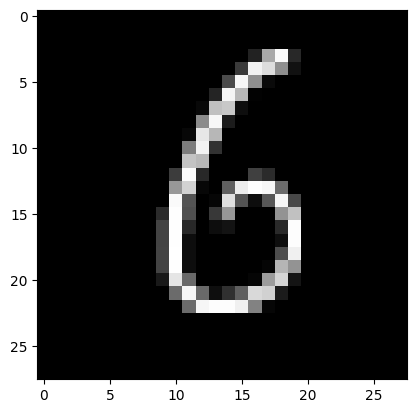

In [23]:
from torchvision import datasets
import matplotlib.pyplot as plt
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
# Let us examine the 18th record from this training dataset
image, label = train_dataset[18]
plt.imshow(image, cmap="gray")
print(f'Label of the 18th Image is: {label}')


Now that we understand the MNIST dataset, Let us try to study following Pytorch code that uses single layer NN wrapped inside our own model class called "SingleLayerModel". Even with just one layer it gives pretty decent accuracy. It uses two new things that we have not seen before namely the DataLoader and transforms. So before we jump into the code let us quickly talk about DataLoader and Transforms.
### About DataLoader and Transforms

 In most of the real life problmes the data can be massive and it may not be always possible to load the entire data in memory also as we have already seen we may want to split the training data into multiple minibatches. That is exactly what this **DataLoader** helps us to do. To use DataLoader your data must be wrapped inside a class that implements certain protocols like __iter__(), __getitem__(), __len()__ or in other words it must be derived from torch.utils.data.IterableDataset. <br/>  The training data may not be always in the most desirable format, so we may have to pre-process, massage or manipulate the data before it can be fed to the training model, in other words data must be transformed into a more suitable format. That is where the **trasnforms** comes into picture. You can also chain multiple transforms using the Compose class, to perform more than one preprocessing steps before feeding the data to your model. Several transforms like ToTensor, Normalize, Resize, CenterCrop, Grayscale, GaussianBlur are readily available in pytorch.transforms. Although you can easily do any custom transformation in your Models forward pass function itself, but if you ever need to write your own custom transform fucntion then even that is possible with the help of the transforms.Lambda() class. <br/>Both these DataLoader and Transforms are very useful and make the code smaller and manageable.<br/> Coming back to our MNIST code, we can certainly write the same code without using DataLoader and transforms, but we will first study the code with these constructs. Once you look at the other code later you will understand why we did not start with this sample.

In [24]:
# %%timeit
# Uncomment the above line if you want to measure the time taken by the following code
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define a simple single-layer model
class SingleLayerModel(nn.Module):
    def __init__(self):
        super(SingleLayerModel, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)  # Input size: 28x28, Output size: 10 (digits)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.linear(x)
        return x

# Load MNIST dataset
mytransform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=mytransform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create the model
model = SingleLayerModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Training is completed, let us check one random input sampel and the predicted label
# let us check the 23th record from training data
idata23, label23 = train_dataset[23]
prediction = model(idata23)

# prediction is a tensor with 10 values that indicate the probability of the inpute representing each digit
# let us find out which digit has the highest probabilty using the torch.argmax, it gives you the index of the highest value

print(f'\nPredicted Digit is: {torch.argmax(prediction)} and the actual Label from the Training Data is: {label23}')

# Instead of checking individual random values lets us check all the Test data and find the overall accuracy

correct = 0
total = 0
test_dataset = datasets.MNIST(root='./data', train=False, transform=mytransform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = (correct / total) * 100
print(f'Accuracy: {accuracy:.2f}%')


Epoch [1/10], Loss: 0.4702
Epoch [2/10], Loss: 0.3907
Epoch [3/10], Loss: 0.2660
Epoch [4/10], Loss: 0.2588
Epoch [5/10], Loss: 0.3872
Epoch [6/10], Loss: 0.2883
Epoch [7/10], Loss: 0.1398
Epoch [8/10], Loss: 0.3325
Epoch [9/10], Loss: 0.1927
Epoch [10/10], Loss: 0.3945

Predicted Digit is: 1 and the actual Label from the Training Data is: 1
Accuracy: 91.76%


As we can see above this works and the accuracy is also pretty good for a single layer model. In this code we are using transforms to convert the data into a Pytorch tensor and also to normalize the data. Normalizing or scaling the data to a fixed range is said to help to "learn" faster,  not you to learn faster but for the NN to learn faster.<br> Following code is trying to explain what the DataLoader and the trasnforms are trying to do internally. It is a lot messier than the previous code and probably will help you appreciate why the previous is much better. <br/> But you can clearly see that the below is code significantly faster because there we are avoiding the overheads added by DataLoader and also using the numpy vectorization to convert the lists into numpy array before converting them to Pytorch Tensors. You can verify it yourself by adding "%%timeit"   to the first line of both these examples and check the average time taken by both these programs, but just be aware that by default the **%%timeit magic** runs your code multiple times and computes the average time.

In [25]:
# %%timeit
# Uncomment the above line if you want to measure the time taken by the following code
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
import numpy as np

# Define a simple single-layer model
class SingleLayerModel(nn.Module):
    def __init__(self):
        super(SingleLayerModel, self).__init__()
        self.linear = nn.Linear(28 * 28, 10)  # Input size: 28x28, Output size: 10 (digits)
        #self.linear = torch.nn.Sequential( torch.nn.Linear(28 * 28, 64) , torch.nn.Linear(64, 10), torch.nn.ReLU())

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.linear(x)
        return x

# Notice that we are not using the Transform here so we will have to normalize the data if we want to
# we must convert the data to a Pytorch tensor ourselves
mnist_train = datasets.MNIST(root="./data", train=True, download=True)
mnist_test = datasets.MNIST(root="./data", train=False, download=True)

# MNIST training dataset consists of 60000 tuples, first part is the image data and second part is the label
# Let us extract all the Image inputs by separating the labels

imageData_train = [data[0] for data in mnist_train]
labels_train = [data[1] for data in mnist_train]

# convert all the Image objects to np array so that we can convert it to a Tensor
# Otherwise you can not directly convert a PIL.Image type object into a tensor

imgData_train = np.array([ np.array(x) for x in imageData_train])

# Convert the list into a Tensor of Tensors
imData_train = torch.Tensor(imgData_train)[:, np.newaxis,:]
lbls_train = torch.Tensor(labels_train).long()

# instantiate the model
model = SingleLayerModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    for mbi in range(0,60000, batch_size):
        optimizer.zero_grad()
        outputs = model(imData_train[mbi: (mbi+batch_size)])
        loss = criterion(outputs, lbls_train[mbi: (mbi+batch_size)])
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate accuracy

# Extract the inputs and labels from the Test data this time

imageData_test = np.array([data[0] for data in mnist_test])
labels_test = [data[1] for data in mnist_test]

# converyt all the Image objects to np array so that we can convert it to a Tensor
# Otherwise you can not directly convert a PIL.Image type object into a tensor

imgData_test = np.array([ np.array(x) for x in imageData_test])

# Convert the list into a Tensor of Tensors
imData_test = torch.Tensor(imgData_test)
lbls_test = torch.Tensor(labels_test)


correct = 0
total = 0
with torch.no_grad():
        outputs = model(imData_test)
        _, predicted = torch.max(outputs, 1)
        total += lbls_test.size(0)
        correct += (predicted == lbls_test).sum().item()

accuracy = (correct / total) * 100
print(f'Accuracy: {accuracy:.2f}%')


Epoch [1/10], Loss: 39.9566
Epoch [2/10], Loss: 59.5553
Epoch [3/10], Loss: 7.7273
Epoch [4/10], Loss: 28.7690
Epoch [5/10], Loss: 30.6617
Epoch [6/10], Loss: 25.2170
Epoch [7/10], Loss: 21.6608
Epoch [8/10], Loss: 9.4355
Epoch [9/10], Loss: 39.1481
Epoch [10/10], Loss: 0.0000
Accuracy: 82.68%


As you can see the code is not as clean as the previous sample. On top of it the accuracy is also slightly less. Is that because we did not normalize the data? Let us add that last bit and see how it affects the accuracy and also how it affects the running time.

In [26]:
# %%timeit
# Uncomment the above line if you want to measure the time taken by the following code
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

# Define a simple single-layer model
class SingleLayerModel(nn.Module):
    def __init__(self):
        super(SingleLayerModel, self).__init__()
        self.linear = torch.nn.Sequential( torch.nn.Linear(28 * 28, 64), nn.Linear(64, 10), torch.nn.ReLU())

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.linear(x)
        return x

# Torchvision package provides many DataSets, let us Load the MNIST dataset
mnist_train = datasets.MNIST(root="./data", train=True, download=True)
mnist_test = datasets.MNIST(root="./data", train=False, download=True)

# MNIST training dataset consists of 60000 tuples, first part is the image data and second part is the label
# Let us extract all the Image inputs by separating the labels

imageData_train = [data[0] for data in mnist_train]
labels_train = [data[1] for data in mnist_train]

# convert all the Image objects to np array so that we can convert it to a Tensor
# Otherwise you can not directly convert a PIL.Image type object into a tensor

# Now instead of transforms.normalize we are using StandardScalar from sklearn
# Please note that this is not the same as normalize((0.5),(0.5)) but this is much easier to use the standard scalar than
# trying to mimic the above pytorch transform

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

imgdata_tr = [ np.array(x) for x in imageData_train]

normalized_data_tr = [scaler.fit_transform(x) for x in imgdata_tr]

imgData_train = np.array(normalized_data_tr)

# Convert the list into a Tensor of Tensors
imData_train = torch.Tensor(imgData_train)[:, np.newaxis,:]
lbls_train = torch.Tensor(labels_train).long()

# Create the model
model = SingleLayerModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    for mbi in range(0,60000, batch_size):
        optimizer.zero_grad()
        outputs = model(imData_train[mbi: (mbi+batch_size)])
        loss = criterion(outputs, lbls_train[mbi: (mbi+batch_size)])
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate the accuracy

# MNIST Test dataset consists of 10000 tuples first part is the image data and the second part is the label
# Let use a different syntax this time, achieves the same results

imageData_test = [data[0] for data in mnist_test]
labels_test = [data[1] for data in mnist_test]


imgdata_test = [ np.array(x) for x in imageData_test]

# Notice that this additinal step of again scaling the Test data is not required when you are using the
# transforms as the entire dataset gets normalized to begin with when we load it

normalized_data_test = [scaler.fit_transform(x) for x in imgdata_test]

imgData_test = np.array(normalized_data_test)

# Convert the list into a Tensor of Tensors
imData_test = torch.Tensor(imgData_test)
lbls_test = torch.Tensor(labels_test)


correct = 0
total = 0
with torch.no_grad():
        outputs = model(imData_test)
        _, predicted = torch.max(outputs, 1)
        total += lbls_test.size(0)
        correct += (predicted == lbls_test).sum().item()

accuracy = (correct / total) * 100
print(f'Accuracy: {accuracy:.2f}%')


Epoch [1/10], Loss: 0.1665
Epoch [2/10], Loss: 0.1172
Epoch [3/10], Loss: 0.0960
Epoch [4/10], Loss: 0.0844
Epoch [5/10], Loss: 0.0770
Epoch [6/10], Loss: 0.0720
Epoch [7/10], Loss: 0.0684
Epoch [8/10], Loss: 0.0664
Epoch [9/10], Loss: 0.0645
Epoch [10/10], Loss: 0.0635
Accuracy: 92.15%


As you can see that it has increased the running time but has also increased the Accuracy. But it still faster than the transformers version above.<br/>To continue our method of trying  the same thing in sklearn as well as Pytorch NN, we should also try to rewrite the above MNIST dataset problem using the sklearn to continue our tradition. So for the sake of completeness here is the sklearn way of solving MNIST Problem using Random Forest classifier.
## MNIST: The sklearn Way

In [27]:
# %%timeit
# Uncomment the above line if you want to measure the time taken by the following code
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the MNIST dataset from scikit-learn's datasets module
mnist = fetch_openml(name='mnist_784', parser="pandas")

# Extract features (X) and labels (y) from the dataset
X = mnist.data
y = mnist.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=60, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100 * accuracy:.2f}%")


Accuracy: 96.53%


As you can see the sklearn Random Forest has a much better accuracy score. So may be we can improve our Pytorch code accuracy by adding a couple of hidden layers. <br/>Now that you have enough understanding of using Pytorch and also basic understanding of the above problem you should be able to experiment on your own to improve our MNIST Pytorch Code.

## So What? / What Next ?

One school of thought goes like this: _"Even if you do not really understand how the Internal Combustion Engine inside your vehicle works, you can still use it, you can make it driver faster or slower, you just know how to use it."_ <br/>So what is the point of all this, why do you need to understand all these internal details? If you just know what all things are available out there and you know how to use them in practice then that is all you need. As long as you can join the various technological pieces together and are able to solve some real world problem that is really worth solving then that is all that matters. The Open Source community and various services out there have really made the Machine Learning so much accessible. Now with the advent of Hugging Face and thousands of AI/ML services and resources, you can build really great things with just few lines of code in just few minutes. <br/> To give you a taste of the transformers; here is a small code sinpette; 

In [28]:
from transformers import pipeline
import pytesseract


# If you want to try running this locally on your machine
# make sure that you install the tesseract-OCR for windows and update the actual exe path below
pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# Initialize the document-question-answering pipeline
nlp = pipeline("document-question-answering", model="impira/layoutlm-document-qa")

# I used a local file for my experiments, if you want to try this yourself the link is given below in the description
image_path = "docImage.png"

question1 = "What are some other names for the slingshot effect?"
result = nlp(image_path, question1)
print(f"\nQ1. {question1} \nAnswer: {result[0]["answer"]}")

question2 = "What is the planetary swing-by used for?"
result = nlp(image_path, question2)
print(f"\nQ2. {question2} \nAnswer: {result[0]["answer"]}")

question3 = "Does gravity-assist manoeuvre help in increasing the speed or only changes the direction?"
result = nlp(image_path, question3)
print(f"\nQ3. {question3} \nAnswer: {result[0]["answer"]}")


Q1. What are some other names for the slingshot effect? 
Answer: planetary swing-by or a gravity-assist manoeuvre.

Q2. What is the planetary swing-by used for? 
Answer: change of direction of a spacecraft as it passes close to a planet.

Q3. Does gravity-assist manoeuvre help in increasing the speed or only changes the direction? 
Answer: It is performed to achieve an increase in speed


Isn't this really easy? In the above code you are reading an image file, converting it to text and then answering some question based on the contents of that converted text in just a few lines. If you want to check the image file then <a href="http://dl.dropboxusercontent.com/scl/fi/yh3leb1bcly4uf48nmfwe/DocImage.png?rlkey=0s0hiauf5hkhpunlxnf4hwa12&dl=0"> here is the actual Image file .</a><br/>In just few lines we can do so many cool things like Qustion Answering, Sentiment analysis, Text Generation, Translation. There are so many paid services, free open source resources out there that really "Imagination is the only limit". Looking at all this you kind of tend to agree with the "Just Make Use Of It" school of thought. But for some pople like  me, the process of learning and understanding the workings of these things has it's own reward. Sometime when you want to improve certain things or if things are not working "as-it-is", then a deeper understanding might be needed. <br/> This was a brief introudction to Machine Learning using Pytroch with the main focus on Code. There is still a long way to. I hope that someone somewhere finds it useful. <br/> **Happy Learning and Happy Coding !!**